In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import shap


import math

In [2]:
df = pd.read_csv("../../Data/df_standardised_end_test_6hr.csv")
df = df.drop(columns = ["Unnamed: 0","X","X1.hr","X2.hr","X3.hr","X9.hr","X10.hr"
                        ,"X11.hr","X12.hr","X13.hr","X14.hr","X15.hr","X16.hr","X17.hr","X18.hr","X19.hr"
                        ,"X20.hr","X21.hr","X22.hr","X23.hr","X24.hr","X25.hr","X26.hr","X27.hr","X28.hr","chunk"])
df

,abnormal,X4.hr,X5.hr,X6.hr,X7.hr,X8.hr,train_test
0,0,-0.437480,0.710856,1.819656,0.310877,-0.650791,train
1,0,-0.024752,-0.437480,0.710856,1.819656,0.310877,train
2,0,-1.372619,-0.024752,-0.437480,0.710856,1.819656,train
3,0,-0.601068,-1.372619,-0.024752,-0.437480,0.710856,train
4,0,0.417116,-0.601068,-1.372619,-0.024752,-0.437480,train
...,...,...,...,...,...,...,...
31653,0,1.253461,0.491539,0.483600,-0.892592,1.115237,test
31654,0,0.514161,1.253461,0.491539,0.483600,-0.892592,test
31655,0,-0.053325,0.514161,1.253461,0.491539,0.483600,test
31656,0,-0.091542,-0.053325,0.514161,1.253461,0.491539,test


In [3]:
train = df.loc[df['train_test'] == "train"]
test = df.loc[df['train_test'] == "test"]

In [4]:
y_train = train.pop("abnormal")
X_train = train
X_train = X_train.drop(columns = ["train_test"])
y_test = test.pop("abnormal")
X_test = test
X_test = X_test.drop(columns = ["train_test"])

In [5]:
def get_results(truth, prediction, df, idx):
    

    acc = accuracy_score(truth, prediction)
    f1 = f1_score(truth, prediction)
    precision = precision_score(truth, prediction)
    recall = recall_score(truth, prediction)

    df.loc[idx,:] = [acc, f1, precision, recall]

    return df


In [6]:
results = pd.DataFrame(index = ['Decision Tree'], 
                       columns = ['accuracy', 'f1', 'precision', 'recall'])

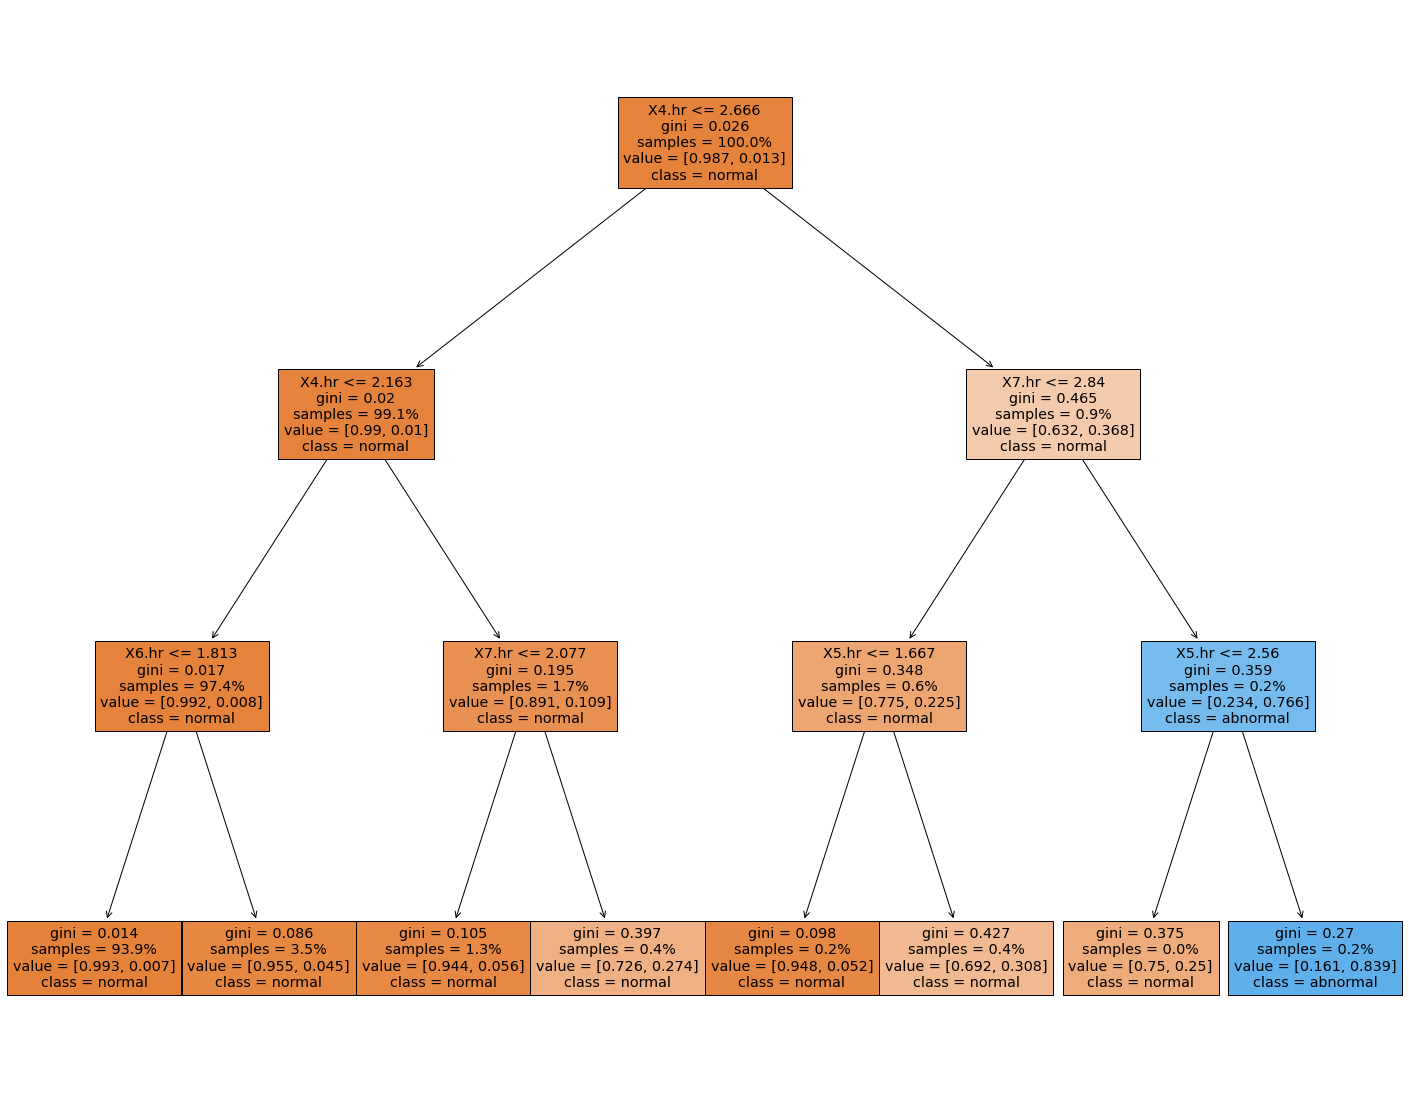

In [7]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 13)
clf.fit(X=X_train,y=y_train)

y_pred = clf.predict(X_test)

results = get_results(y_test, y_pred, results, 'Decision Tree')


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names=['normal', 'abnormal'],
                   filled=True,  proportion = True)


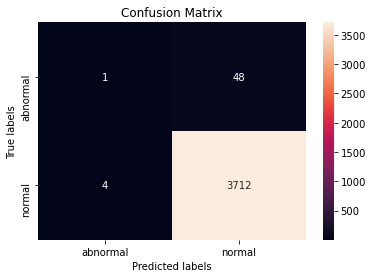

In [8]:
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['abnormal', 'normal']); 
ax.yaxis.set_ticklabels(['abnormal', 'normal'])

plt.show()

In [9]:
results

,accuracy,f1,precision,recall
Decision Tree,0.986189,0.037037,0.2,0.0204082


In [10]:
for i in range(100):
    clf = DecisionTreeClassifier(max_depth = 3, class_weight={0:1, 1:i}, random_state = 13)
    clf.fit(X=X_train,y=y_train)

    y_pred = clf.predict(X_test)

    results = get_results(y_test, y_pred, results, i)


    #fig = plt.figure(figsize=(25,20))
    #_ = tree.plot_tree(clf, 
                   #feature_names=X_train.columns,  
                   #class_names=['normal', 'abnormal'],
                   #filled=True,  proportion = True)


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [11]:
results.sort_values('f1', ascending=False)

,accuracy,f1,precision,recall
5,0.981939,0.358491,0.333333,0.387755
6,0.981939,0.358491,0.333333,0.387755
7,0.977424,0.341085,0.275,0.44898
8,0.977424,0.341085,0.275,0.44898
9,0.977424,0.341085,0.275,0.44898
...,...,...,...,...
80,0.732537,0.0820419,0.0429389,0.918367
79,0.732537,0.0820419,0.0429389,0.918367
1,0.986189,0.037037,0.2,0.0204082
Decision Tree,0.986189,0.037037,0.2,0.0204082


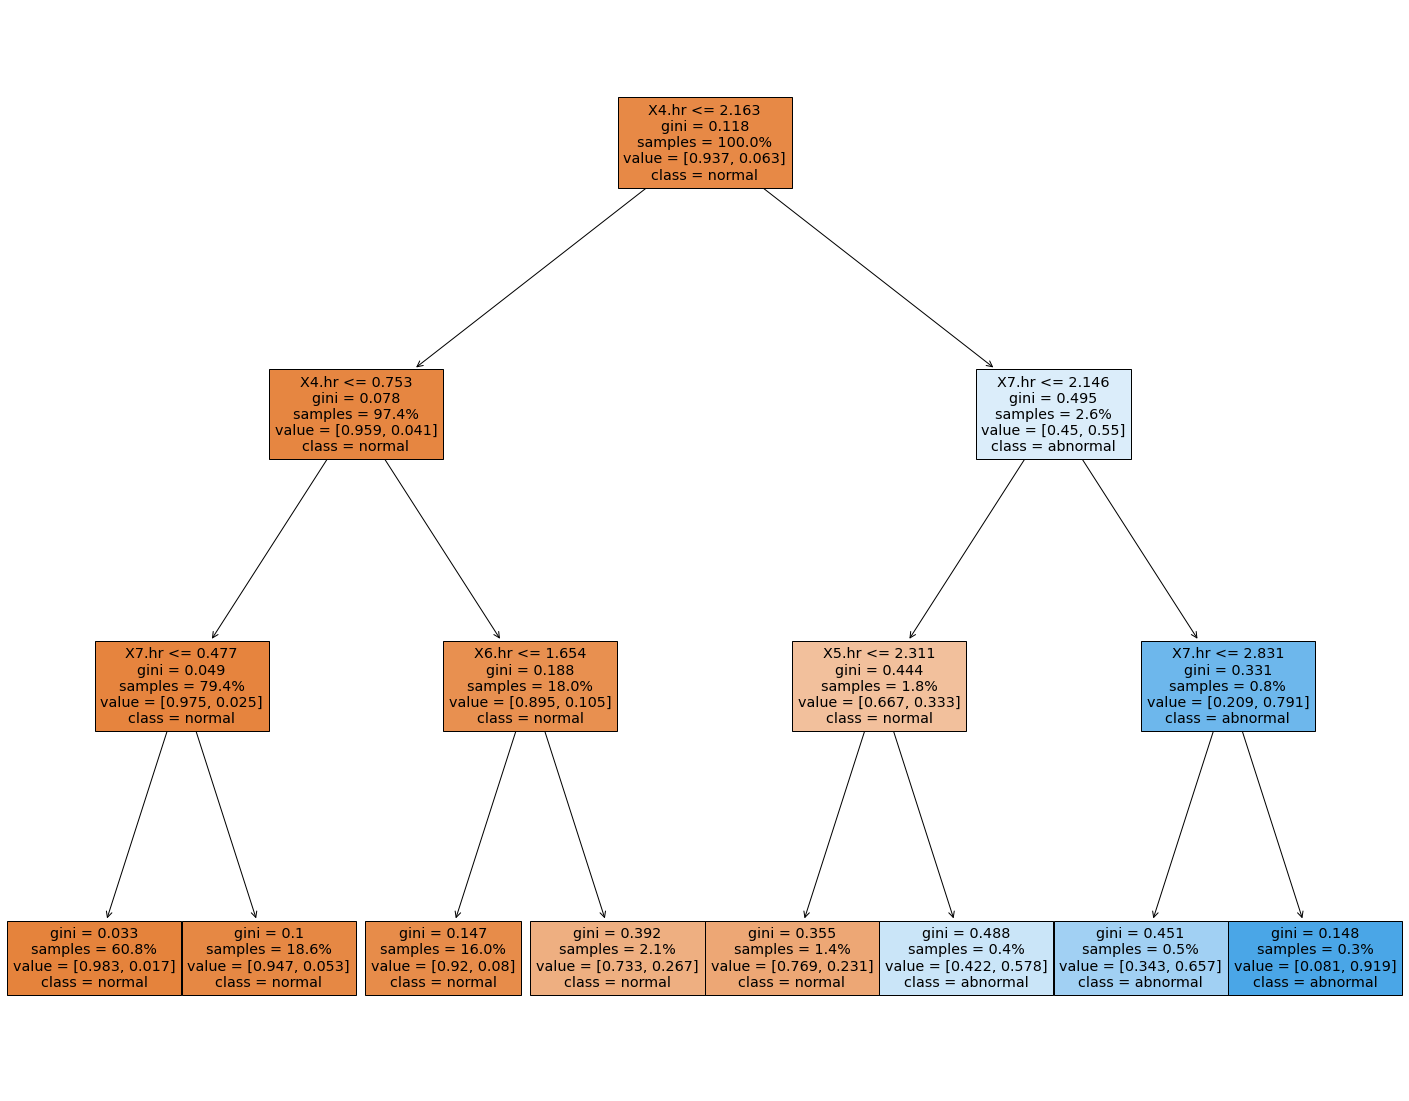

In [12]:
clf = DecisionTreeClassifier(max_depth = 3, class_weight={0:1, 1:5}, random_state = 13)
clf.fit(X=X_train,y=y_train)

y_pred = clf.predict(X_test)

results = get_results(y_test, y_pred, results, i)


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                feature_names=X_train.columns,  
                class_names=['normal', 'abnormal'],
                filled=True,  proportion = True)

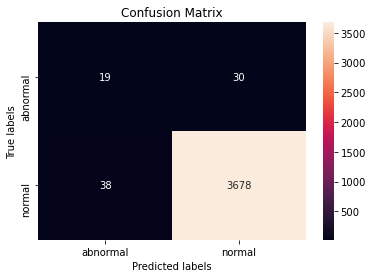

In [13]:
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['abnormal', 'normal']); 
ax.yaxis.set_ticklabels(['abnormal', 'normal'])

plt.show()

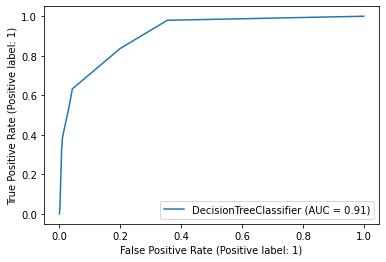

In [14]:
plot_roc_curve(clf,X_test,y_test)
plt.show()

In [15]:
y_score = clf.predict_proba(X_test)

In [16]:
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

y_test = y_test.reset_index()
y_test = y_test.drop(columns = ["index"])
y_test = y_test.squeeze()

y_pred = pd.Series(y_pred)

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_test[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_test[indices], y_score[indices, 1])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))


sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Bootstrap #1 ROC area: 0.867
Bootstrap #2 ROC area: 0.926
Bootstrap #3 ROC area: 0.931
Bootstrap #4 ROC area: 0.936
Bootstrap #5 ROC area: 0.924
Bootstrap #6 ROC area: 0.876
Bootstrap #7 ROC area: 0.889
Bootstrap #8 ROC area: 0.926
Bootstrap #9 ROC area: 0.908
Bootstrap #10 ROC area: 0.896
Bootstrap #11 ROC area: 0.907
Bootstrap #12 ROC area: 0.901
Bootstrap #13 ROC area: 0.915
Bootstrap #14 ROC area: 0.934
Bootstrap #15 ROC area: 0.896
Bootstrap #16 ROC area: 0.908
Bootstrap #17 ROC area: 0.905
Bootstrap #18 ROC area: 0.875
Bootstrap #19 ROC area: 0.904
Bootstrap #20 ROC area: 0.888
Bootstrap #21 ROC area: 0.916
Bootstrap #22 ROC area: 0.915
Bootstrap #23 ROC area: 0.908
Bootstrap #24 ROC area: 0.948
Bootstrap #25 ROC area: 0.917
Bootstrap #26 ROC area: 0.919
Bootstrap #27 ROC area: 0.910
Bootstrap #28 ROC area: 0.910
Bootstrap #29 ROC area: 0.933
Bootstrap #30 ROC area: 0.861
Bootstrap #31 ROC area: 0.948
Bootstrap #32 ROC area: 0.910
Bootstrap #33 ROC area: 0.918
Bootstrap #34 ROC a

Bootstrap #312 ROC area: 0.912
Bootstrap #313 ROC area: 0.908
Bootstrap #314 ROC area: 0.940
Bootstrap #315 ROC area: 0.953
Bootstrap #316 ROC area: 0.896
Bootstrap #317 ROC area: 0.892
Bootstrap #318 ROC area: 0.914
Bootstrap #319 ROC area: 0.904
Bootstrap #320 ROC area: 0.870
Bootstrap #321 ROC area: 0.926
Bootstrap #322 ROC area: 0.936
Bootstrap #323 ROC area: 0.931
Bootstrap #324 ROC area: 0.930
Bootstrap #325 ROC area: 0.916
Bootstrap #326 ROC area: 0.896
Bootstrap #327 ROC area: 0.912
Bootstrap #328 ROC area: 0.896
Bootstrap #329 ROC area: 0.888
Bootstrap #330 ROC area: 0.945
Bootstrap #331 ROC area: 0.884
Bootstrap #332 ROC area: 0.899
Bootstrap #333 ROC area: 0.913
Bootstrap #334 ROC area: 0.903
Bootstrap #335 ROC area: 0.883
Bootstrap #336 ROC area: 0.902
Bootstrap #337 ROC area: 0.932
Bootstrap #338 ROC area: 0.897
Bootstrap #339 ROC area: 0.896
Bootstrap #340 ROC area: 0.905
Bootstrap #341 ROC area: 0.908
Bootstrap #342 ROC area: 0.898
Bootstrap #343 ROC area: 0.890
Bootstra

Bootstrap #622 ROC area: 0.919
Bootstrap #623 ROC area: 0.907
Bootstrap #624 ROC area: 0.931
Bootstrap #625 ROC area: 0.878
Bootstrap #626 ROC area: 0.928
Bootstrap #627 ROC area: 0.931
Bootstrap #628 ROC area: 0.897
Bootstrap #629 ROC area: 0.905
Bootstrap #630 ROC area: 0.901
Bootstrap #631 ROC area: 0.926
Bootstrap #632 ROC area: 0.881
Bootstrap #633 ROC area: 0.913
Bootstrap #634 ROC area: 0.861
Bootstrap #635 ROC area: 0.921
Bootstrap #636 ROC area: 0.896
Bootstrap #637 ROC area: 0.947
Bootstrap #638 ROC area: 0.922
Bootstrap #639 ROC area: 0.931
Bootstrap #640 ROC area: 0.879
Bootstrap #641 ROC area: 0.924
Bootstrap #642 ROC area: 0.911
Bootstrap #643 ROC area: 0.894
Bootstrap #644 ROC area: 0.934
Bootstrap #645 ROC area: 0.905
Bootstrap #646 ROC area: 0.898
Bootstrap #647 ROC area: 0.959
Bootstrap #648 ROC area: 0.905
Bootstrap #649 ROC area: 0.931
Bootstrap #650 ROC area: 0.896
Bootstrap #651 ROC area: 0.925
Bootstrap #652 ROC area: 0.925
Bootstrap #653 ROC area: 0.933
Bootstra

Bootstrap #933 ROC area: 0.938
Bootstrap #934 ROC area: 0.906
Bootstrap #935 ROC area: 0.934
Bootstrap #936 ROC area: 0.920
Bootstrap #937 ROC area: 0.905
Bootstrap #938 ROC area: 0.941
Bootstrap #939 ROC area: 0.918
Bootstrap #940 ROC area: 0.929
Bootstrap #941 ROC area: 0.914
Bootstrap #942 ROC area: 0.912
Bootstrap #943 ROC area: 0.910
Bootstrap #944 ROC area: 0.946
Bootstrap #945 ROC area: 0.925
Bootstrap #946 ROC area: 0.898
Bootstrap #947 ROC area: 0.915
Bootstrap #948 ROC area: 0.916
Bootstrap #949 ROC area: 0.897
Bootstrap #950 ROC area: 0.906
Bootstrap #951 ROC area: 0.916
Bootstrap #952 ROC area: 0.929
Bootstrap #953 ROC area: 0.906
Bootstrap #954 ROC area: 0.887
Bootstrap #955 ROC area: 0.901
Bootstrap #956 ROC area: 0.902
Bootstrap #957 ROC area: 0.916
Bootstrap #958 ROC area: 0.924
Bootstrap #959 ROC area: 0.903
Bootstrap #960 ROC area: 0.926
Bootstrap #961 ROC area: 0.915
Bootstrap #962 ROC area: 0.899
Bootstrap #963 ROC area: 0.930
Bootstrap #964 ROC area: 0.902
Bootstra